## Business Objective

### Understand sales performance to identify what is selling, where it is selling, and what drives revenue.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("sales_data.csv")
df.head()

,Order_ID,Date,Region,Product,Quantity,Unit_Price,Total_Sales
0,1001,2024-01-01,North,Laptop,2,55000,110000
1,1002,2024-01-02,South,Mobile,5,15000,75000
2,1003,2024-01-03,East,Tablet,3,25000,75000
3,1004,2024-01-04,West,Laptop,1,55000,55000
4,1005,2024-01-05,North,Mobile,4,15000,60000


In [10]:
df.shape

(20, 7)

In [11]:
df.columns

Index(['Order_ID', 'Date', 'Region', 'Product', 'Quantity', 'Unit_Price',
       'Total_Sales'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Order_ID     20 non-null     int64 
 1   Date         20 non-null     object
 2   Region       20 non-null     object
 3   Product      20 non-null     object
 4   Quantity     20 non-null     int64 
 5   Unit_Price   20 non-null     int64 
 6   Total_Sales  20 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ KB


In [12]:
df.isna().sum()

Order_ID       0
Date           0
Region         0
Product        0
Quantity       0
Unit_Price     0
Total_Sales    0
dtype: int64

In [14]:
#coverting datatime colums to datetime dtype for the time future time based operation 
df['Date'] = pd.to_datetime(df['Date'],errors='coerce')

In [15]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20 entries, 0 to 19
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
20 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 292.0 bytes


In [9]:
df.describe()

,Order_ID,Quantity,Unit_Price,Total_Sales
count,20.00000,20.000000,20.000000,20.000000
mean,1010.50000,3.200000,32000.000000,92000.000000
std,5.91608,1.609184,17800.059137,58160.395278
min,1001.00000,1.000000,15000.000000,25000.000000
25%,1005.75000,2.000000,15000.000000,53750.000000
50%,1010.50000,3.000000,25000.000000,75000.000000
75%,1015.25000,4.250000,55000.000000,110000.000000
max,1020.00000,6.000000,55000.000000,220000.000000


## Revenue Understanding

In [ ]:
#How much total revenue is generated?
df['Total_Sales'].sum()

np.int64(1840000)

In [ ]:
#Which product contributes most to revenue?
df.groupby('Product')['Total_Sales'].sum()

Product
Laptop    1045000
Mobile     495000
Tablet     300000
Name: Total_Sales, dtype: int64

In [ ]:
# Which region generates the highest sales?
df.groupby('Region')['Total_Sales'].sum()

Region
East     560000
North    505000
South    315000
West     460000
Name: Total_Sales, dtype: int64

In [ ]:
# which Region sales the most Product?
df.groupby(['Product','Region'])['Total_Sales'].sum()

Product  Region
Laptop   East      385000
         North     330000
         South     110000
         West      220000
Mobile   East       75000
         North     150000
         South     105000
         West      165000
Tablet   East      100000
         North      25000
         South     100000
         West       75000
Name: Total_Sales, dtype: int64

## Sales Behavior

In [23]:
df['Total_Sales'].describe()

count        20.000000
mean      92000.000000
std       58160.395278
min       25000.000000
25%       53750.000000
50%       75000.000000
75%      110000.000000
max      220000.000000
Name: Total_Sales, dtype: float64

In [34]:
#What is the average order size?
average_order = df['Total_Sales'].sum()/len(df['Order_ID'].unique())
average_order

np.float64(92000.0)

In [37]:
df.sort_values(by='Quantity',ascending=False)

,Order_ID,Date,Region,Product,Quantity,Unit_Price,Total_Sales
16,1017,2024-01-17,North,Mobile,6,15000,90000
7,1008,2024-01-08,West,Mobile,6,15000,90000
1,1002,2024-01-02,South,Mobile,5,15000,75000
19,1020,2024-01-20,West,Mobile,5,15000,75000
10,1011,2024-01-11,East,Mobile,5,15000,75000
18,1019,2024-01-19,East,Laptop,4,55000,220000
4,1005,2024-01-05,North,Mobile,4,15000,60000
12,1013,2024-01-13,North,Laptop,4,55000,220000
15,1016,2024-01-16,West,Laptop,3,55000,165000
11,1012,2024-01-12,West,Tablet,3,25000,75000


In [38]:
#Are sales driven by high quantity or high price?

In [ ]:
df.groupby('Product')['Quantity'].sum()

Product
Laptop    19
Mobile    33
Tablet    12
Name: Quantity, dtype: int64

In [48]:
df.groupby('Product')['Total_Sales'].sum()

Product
Laptop    1045000
Mobile     495000
Tablet     300000
Name: Total_Sales, dtype: int64

### By analysis above both operation sales are driven by high price

In [49]:
#Do we see price variation across products?
df.groupby('Product')['Unit_Price'].unique()

Product
Laptop    [55000]
Mobile    [15000]
Tablet    [25000]
Name: Unit_Price, dtype: object

## Operational Insights

### 1 Which products are sold frequently but cheaply?
### 2 Which products are sold less frequently but generate high revenue?
### 3 Is there a region–product combination performing exceptionally well or poorly?

In [54]:
df.head()

,Order_ID,Date,Region,Product,Quantity,Unit_Price,Total_Sales
0,1001,2024-01-01,North,Laptop,2,55000,110000
1,1002,2024-01-02,South,Mobile,5,15000,75000
2,1003,2024-01-03,East,Tablet,3,25000,75000
3,1004,2024-01-04,West,Laptop,1,55000,55000
4,1005,2024-01-05,North,Mobile,4,15000,60000


In [ ]:
# Which products are sold frequently but cheaply?
df.groupby('Product').agg({
    'Quantity':'sum',
    'Unit_Price':'mean'
}).sort_values(by=['Quantity','Unit_Price'], ascending=[False,True])

,Quantity,Unit_Price
Product,,
Mobile,33,15000.0
Laptop,19,55000.0
Tablet,12,25000.0


In [79]:
# Is there a region–product combination performing exceptionally well or poorly?
df.groupby(['Region','Product']).agg({
                          'Quantity':'sum',
                          'Total_Sales':'sum'}).sort_values(by=['Total_Sales'],ascending=(False))

Quantity  Total_Sales
Region Product                       
East   Laptop          7       385000
North  Laptop          6       330000
West   Laptop          4       220000
       Mobile         11       165000
North  Mobile         10       150000
South  Laptop          2       110000
       Mobile          7       105000
East   Tablet          4       100000
South  Tablet          4       100000
East   Mobile          5        75000
West   Tablet          3        75000
North  Tablet          1        25000

## Time-Based Insights (WHY Date matters)

### Are sales consistent over time?
### Do certain days have higher sales?
### Can we identify trends or spikes?

In [85]:
# Are sales consistent over time?
daily_sales = df.groupby('Date')['Total_Sales'].sum()
daily_sales

Date
2024-01-01    110000
2024-01-02     75000
2024-01-03     75000
2024-01-04     55000
2024-01-05     60000
2024-01-06     50000
2024-01-07    165000
2024-01-08     90000
2024-01-09     25000
2024-01-10    110000
2024-01-11     75000
2024-01-12     75000
2024-01-13    220000
2024-01-14     30000
2024-01-15     25000
2024-01-16    165000
2024-01-17     90000
2024-01-18     50000
2024-01-19    220000
2024-01-20     75000
Name: Total_Sales, dtype: int64

In [86]:
daily_sales.describe()

count        20.000000
mean      92000.000000
std       58160.395278
min       25000.000000
25%       53750.000000
50%       75000.000000
75%      110000.000000
max      220000.000000
Name: Total_Sales, dtype: float64

In [87]:
cv = daily_sales.std() / daily_sales.mean()
cv

np.float64(0.6321782095485396)

#### ... By comparing the standard deviation to the mean and analyzing the coefficient of variation, we observe high day-to-day volatility in sales, indicating that sales are not consistent over time.

In [88]:
#Do certain days have higher sales?
df['Date'] = pd.to_datetime(df['Date'])


In [98]:
date=df['day'] = df['Date'].dt.day


In [90]:
df['day_name'] = df['Date'].dt.day_name()


In [91]:
df.groupby('day')['Total_Sales'].sum().sort_values(ascending=False)


day
13    220000
19    220000
16    165000
7     165000
10    110000
1     110000
8      90000
17     90000
20     75000
3      75000
2      75000
11     75000
12     75000
5      60000
4      55000
6      50000
18     50000
14     30000
9      25000
15     25000
Name: Total_Sales, dtype: int64

In [92]:
df.groupby('day_name')['Total_Sales'].sum().sort_values(ascending=False)


day_name
Friday       355000
Saturday     345000
Wednesday    275000
Tuesday      265000
Monday       225000
Sunday       195000
Thursday     180000
Name: Total_Sales, dtype: int64

### Friday & Saturday bring the highest total revenue

In [94]:
# Can we identify trends or spikes?
daily_sales = df.groupby('Date')['Total_Sales'].sum()
daily_sales


Date
2024-01-01    110000
2024-01-02     75000
2024-01-03     75000
2024-01-04     55000
2024-01-05     60000
2024-01-06     50000
2024-01-07    165000
2024-01-08     90000
2024-01-09     25000
2024-01-10    110000
2024-01-11     75000
2024-01-12     75000
2024-01-13    220000
2024-01-14     30000
2024-01-15     25000
2024-01-16    165000
2024-01-17     90000
2024-01-18     50000
2024-01-19    220000
2024-01-20     75000
Name: Total_Sales, dtype: int64

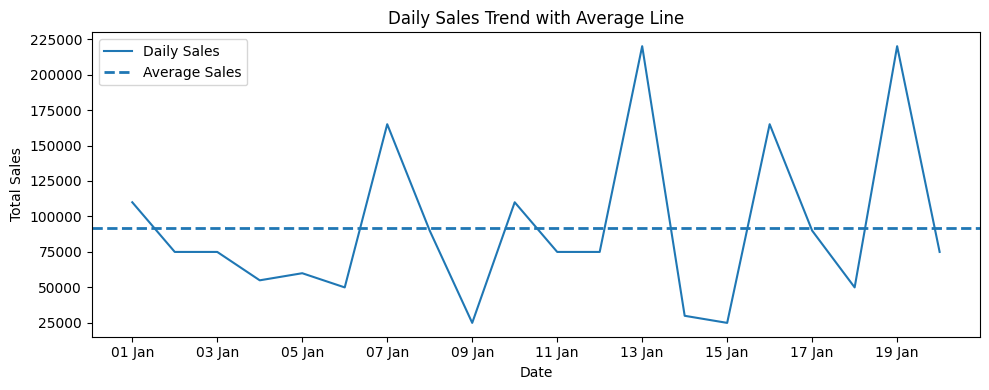

In [113]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(10,4))

# Daily sales line
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')

# Average line
plt.axhline(
    y=average_order,
    linestyle='--',
    linewidth=2,
    label='Average Sales'
)

# Date formatting
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=2))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))

plt.title('Daily Sales Trend with Average Line')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.tight_layout()
plt.show()


### Sales show significant volatility with multiple days exceeding the average sales level, indicating clear sales spikes rather than a stable trend.